# 9기 3주차 과제 정답

In [1]:
!pip3 install numpy 
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn 
!pip3 install scikit-learn
!pip3 install scipy

## 1. y=10+9X+e에 해당하는 자료(산점도) 구성하기.

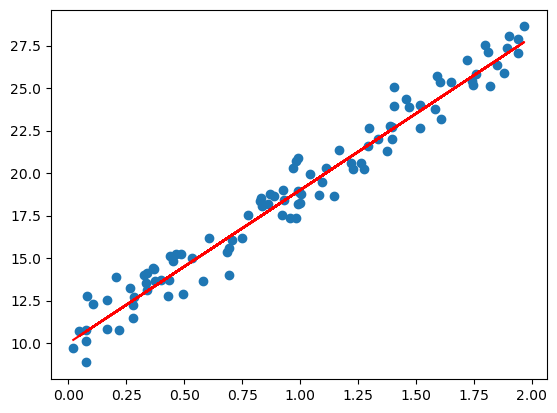

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 난수생성 시드 9
np.random.seed(9)

# 직선식 작성 y=10+9X+e
X=2*np.random.rand(100,1)
e=np.random.randn(100,1)
y=10+9*X+e

# 산점도 그리기
plt.scatter(X,y)

# 과제1 정답
x_line = X
y_line = 10+9*x_line

plt.plot(x_line, y_line, color='red');

## scikit-learn LinearRegression을 이용해 캘리포니아 중간주택가격(='MedHouseVal') 예측
##### **보스턴데이터는 주택가격 데이터셋이 1.2버전부터 제거되어 캘리포니아로 대체

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import fetch_openml
%matplotlib inline

# california 데이타셋 로드
housing = fetch_openml(name="house_prices", as_frame=True)

# california 데이타셋 DataFrame 변환
california = fetch_california_housing(as_frame=True)
californiaDF = california['frame'] #'frame'이라는 속성은 이 데이터셋 객체에 포함된 데이터를 데이터프레임 형태로 제공합니다.
californiaDF.head()

c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


* MedInc: 중간 소득  
* HouseAge: 주택 연식  
* AveRooms: 평균 방 수  
* AveBedrms: 평균 침실 수  
* Population: 인구  
* AveOccup: 평균 자가 비율  
* Latitude: 위도  
* Longitude: 경도  
* MedHouseVal: 주택 가격의 중앙값  

### 산점도를 통해 회귀직선 표현

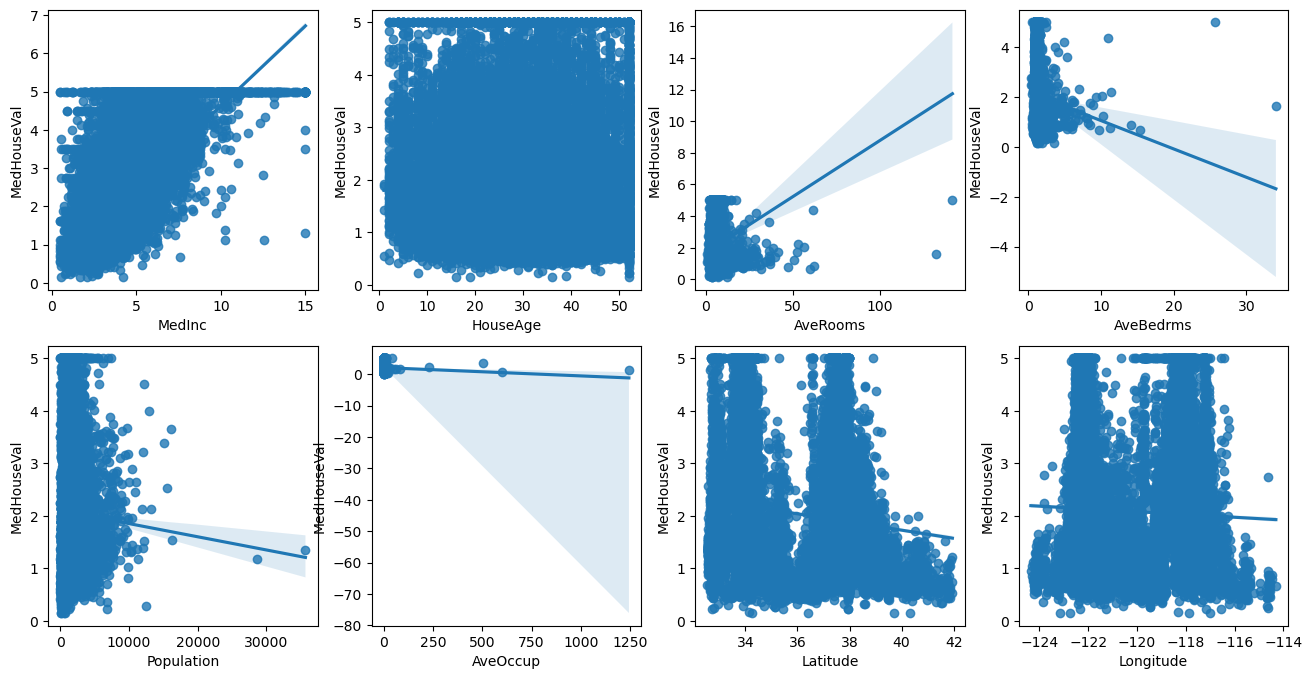

In [3]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['MedInc','HouseAge','AveRooms', 'AveBedrms','Population', 'AveOccup',
               'Latitude', 'Longitude']

for i, feature in enumerate(lm_features):
    row = int(i / 4)
    col = i % 4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='MedHouseVal', data=californiaDF, ax=axs[row][col])


### 2. y_target에는 'MedHouseVal', X_data에는 'MedHouseVal'를 제외한 나머지 피처를 이용하여 다중회귀 모델 만들기

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

# 과제 2 정답
# 데이터 준비
# y_target은 'MedHouseVal', X_data은 'MedHouseVal'이외 칼럼들로 설정
y_target = californiaDF['MedHouseVal']
columns=californiaDF.columns.drop('MedHouseVal')
X_data =  californiaDF[columns]

# 데이터 분할 
# Test Size는 0.3으로 (난수는 자유)
X_train , X_test , y_train , y_test =train_test_split(X_data, y_target, test_size=0.3, random_state=30)

# Linear Regression OLS로 학습/예측/평가 수행 
# 모델 생성
lr = LinearRegression()

# 학습
lr.fit(X_train,y_train)

# 예측
y_preds = lr.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

# MSE값 출력
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))


MSE : 0.566 , RMSE : 0.752
Variance score : 0.590


In [5]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: -35.93039879568149
회귀 계수값: [ 0.4  0.  -0.1  0.6 -0.  -0.  -0.4 -0.4]


In [6]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

AveBedrms     0.6
MedInc        0.4
HouseAge      0.0
Population   -0.0
AveOccup     -0.0
AveRooms     -0.1
Latitude     -0.4
Longitude    -0.4
dtype: float64

##### MedHouseVal = - 37.239 + AveBedrms\*0.6 + MedInc\*0.4 + AveRooms*-0.1 + Latitude*-0.4 + Longitude*-0.4 

## 3. 릿지회귀

In [7]:
# 앞의 LinearRegression예제에서 분할한 feature 데이터 셋인 
# X_data과 Target 데이터 셋인 Y_target 데이터셋을 그대로 이용 
from sklearn.linear_model import Ridge

# 과제3 정답
# 릿지회귀 모형 생성. alpha=10
ridge = Ridge(alpha=10)

# 학습
ridge.fit(X_train,y_train)

# 예측
y_pred = ridge.predict(X_test)

# 평가 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}'. format(mse))
print('RMSE:{0:.3f}'. format(rmse))

MSE: 0.566
RMSE:0.752


## 4. MAE가 아닌 RMSE를 사용하는 이유는 무엇인가요?

MAE는 실제 값과 예측값의 차이를 절댓값으로 변환해 평균낸 것입니다.   
MAE는 다른 지표들에 비해 직관적이라는 특징을 가지고 있는데, 이러한 장점을 가진 MAE가 아닌 RMSE를 사용하는 이유는 무엇인지 설명해주세요.

MAE는 오차 값들에 대해 MAE는 오차들의 절댓값의 평균을 계산한다는 점에서, 모든 오차에 동일한 가중치를 부여한다. 반면에, RMSE는 각 오차에 제곱을 취한 뒤 평균을 구하고, 그것에 루트를 씌우는 것이기 때문에, 각 오차가 다른 가중치를 갖는다. 즉 이상치에 대해 MAE가 RMSE보다 더 둔감하다는 것이다. 즉 이는 과적합 문제에 대한 방안이 될 수도 있지만 이는 분석자에 의해 결정되어야 할 사안입니다.

## 5.편향-분산 트레이드 오프에 대해서 자세히 설명후 해결방안을 찾아주세요

### 5-1. 편향 분산의 차이점을 과대과소 적합을 활용하여 설명해주세요  

편향은 예측 모델로부터 데이터들이 떨어져 있는 정도이고, 이는 너무 복잡한 에측 모델로 인해 편향은 작은 대신 분산이 커지는 과소적합이 발생하게 된다는 것으로 설명할 수 있다.

In [ ]:
분산은 예측값 간의 떨어져 있는 정도, 변동성을 의미 하고, 이는 너무 간단한 모델로 인해 편향은 작지만 분산은 커지는 과대적합이 발생하게 된다는 것으로 설명할 수 있다.

### 5-2. 트레이드 오프 문제점 해결 방안을 서술해주세요

트레이드 오프 문제는 편향과 분산간의 반비례 관계를 의미한다. 이를 해결하기 위해서는 골디락스 지점을 찾는 것이다. 보통은 추정량을 결정할 때 처럼 먼저 편향을 작게 하고 그 중에서 분산이 작은지점인 최적화지점, 골디락스 지점을 찾는다. 통계적 모델링을 할때 모수를 추정할 때 이용할 최소분산불편추정량이 이에 대한 예시가 될 수 있는데 먼저 편이가 0일때 분산이 최소가 되는 지점을 찾는다.